# CA2: AI Informed Searching 

### Question 1

#### (a)

#####      (i)  One difference between a graph and a tree. 

•	A graph has a network data structure whereas a tree has hierarchical data structure.

•	A graph can have unidirectional or bidirectional path between vertices but a tree only has one path between two nodes.

•	The graph data does not have a root note but the root node is the topmost node of tree data.

•	Graphs can have loops but trees cannot have loops.

•	Graphs are more complex compared to trees as they can have loops, cycles etc.

•	All trees are graphs but all graphs are not trees.

(Singh, 2019) (FIT1029 at Monash, 2015) (Mishra, 2017)


#### (ii) Explain how the graph is an abstraction of the problem. 

It is well said that the graph is an abstraction of the problem, it helps to create a general idea of what the problem is and the most suitable way to solve it. The process of abstraction helps to remove all details that does not help towards solving the problem. This means that the graph which is an abstract representation of a real world problem would have only the information necessary/important in finding the solution. By having the proper graph representation of our problem we could use the appropriate algorithms or theories to find a solution. Graph is a very useful type of data structure that helps in representation of data a processing them with use of various algorithms. Graphs as an abstraction of a problem are used in many real world applications like navigation systems/GPS, games like chess, checkers, tic-tac-toe etc.

#### (iii) Identify two advantages of using a visualisation such as the one shown in Fig. 1. 

Graph visualisations are very useful in the representation of data in a simplified form that is easy to grasp. As represented in Fig.1 the graph helps in understanding the information faster thus resulting in reduced time to action. It helps in identifying correlations in data. This sort of representation is very useful in finding the shortest path.

### (b)  Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation. 

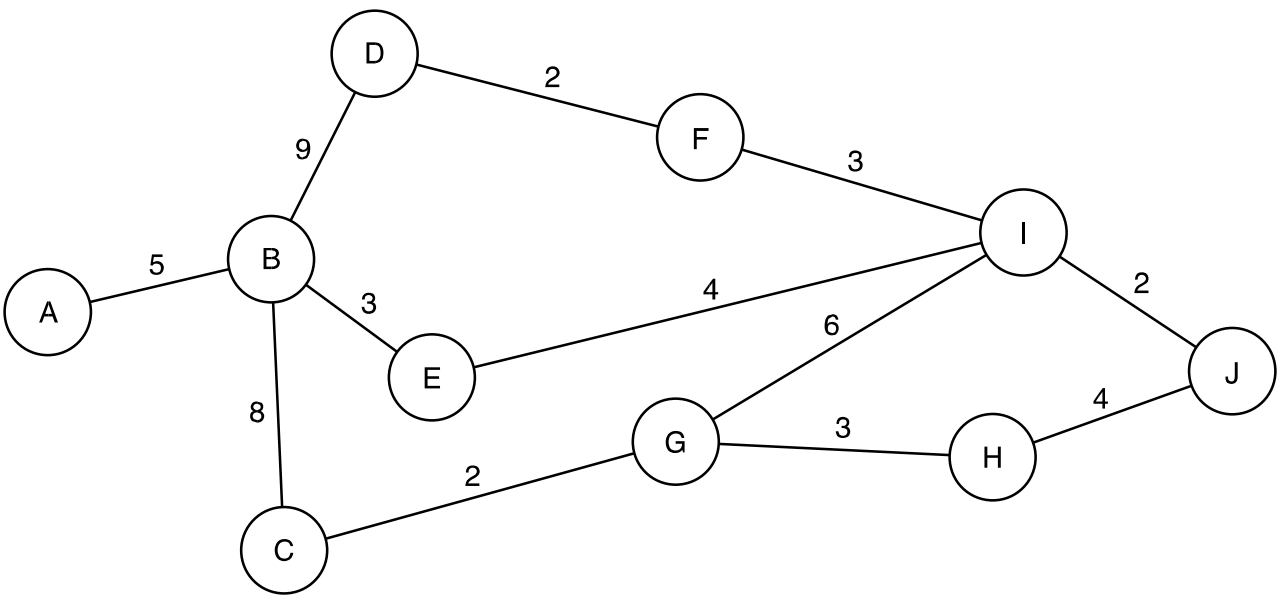

Fig.1

Dijkstra’s algorithm will find the shortest paths between vertices in a graph (it will find the shortest path from a given starting vertex to every other vertex in the graph.). Here our objective is to find the shortest path from vertex A to every other vertex. Once we run the Dijkstra’s algorithm, it will generate this information, (In our case all these data’s will not be there because we will find the destination vertex before but I am adding all data’s into the table):

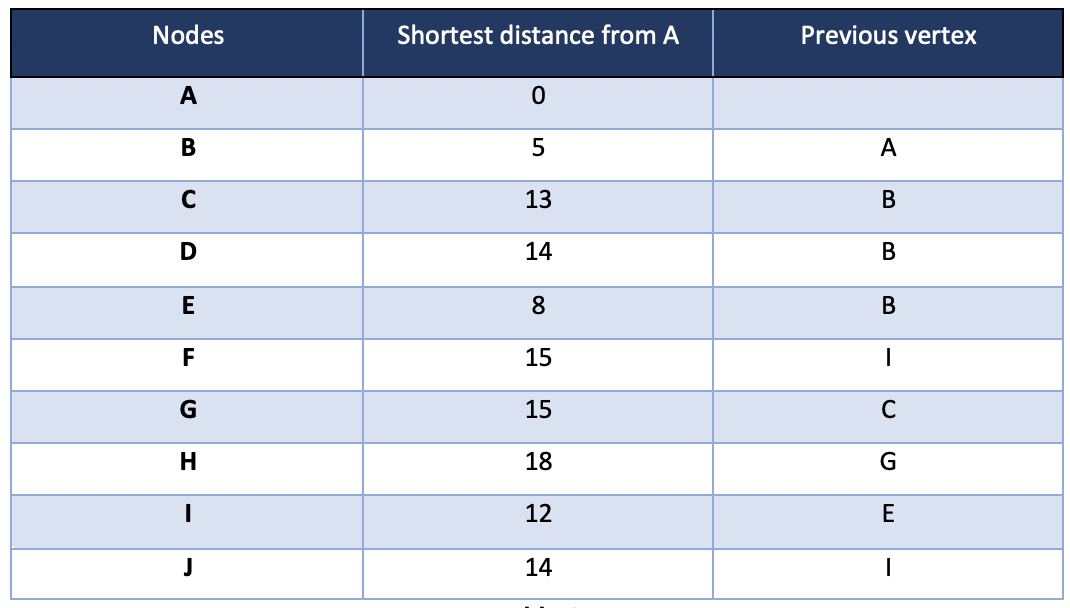

To generate the above data Dijkstra’s algorithm will make two lists, in the beginning the list will be like this:

•	Visited list [ ]

•	Unvisited list  [A, B, C, D, E, F, G, H, I, J]

First vertex is A (our starting Vertex). it will look for unvisited neighbours, here its B, because B is the only vertex that A shares edges with. Next we calculate the distance with each neighbour from the starting vertex. Here from A to B is 5 (0 + 5 = 5). Then we update the shortest distance and previous vertex in to the table. We already visited A so we won’t be visiting A again. 

•	Visited list [ A]

•	Unvisited list  [B, C, D, E, F, G, H, I, J]

The algorithm will repeat again from the unvisited vertex with the smallest distance from the starting vertex. Here its B and the unvisited neighbours are D, E and  C. The current vertex B will calculate the distance of each neighbours from the starting vertex (D : 5 + 9 = 14, E: 5 + 3 = 8, C: 5 + 8 = 13) and we will add new values and previous vertex in to the table and also update the shortest distance and previous vertex (Overwrite) if the calculated distance of the vertex is less than known vertex. We already visited vertex A and B so we will not visit A and B again. 

•	Visited list [A, B ]

•	Unvisited list  [C, D, E, F, G, H, I, J]

The algorithm will repeat again from the unvisited vertex with the smallest distance from the starting vertex. Here it’s E and the unvisited neighbours are I, F and G. The current vertex E will calculate the distance of each neighbours from the start vertex (I : 5 + 3 + 4 = 12, F: 5 + 3 + 4 + 3 = 15, G: 5 + 3 + 4 + 6 = 18) and we will add new values in to the table and also update the shortest distance and previous vertex (Overwrite) if the calculated distance of the vertex is less than known vertex. 

•	Visited list [A, B, E ]

•	Unvisited list  [C, D, F, G, H, I, J]

The algorithm will repeat again from the unvisited vertex with the smallest distance from the starting vertex. Here it’s I and the unvisited neighbours are J, G and H. The current vertex I will calculate the distance of each neighbours from the start vertex as we did so far but this time one of the neighbour is our destination vertex. So we finally find the destination vertex J.
So the shortest path form vertex A to vertex J is : A, B, E, I, J (A -> B -> E -> I -> J)  and the shortest distance is 14 (5 + 3 + 4 + 2 = 14). (Computer Science, 2016)


### Question 2

#### A* algorithm is more efficient at finding the shortest path because it uses heuristics. 
###### Comparing the performance of Dijkstra’s algorithm and the A* search algorithm, making reference to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-up (Note additional marks for including time statistics) 

# Dijkstra’s Algorithm 

In [49]:
# Importing 
import time
start_time = time.time()

def dijkstra_algorithm(graph,start_vertex,find_vertex,visited = [],distances = {},predecessors = {}):
  
    # a few sanity checks
    if start_vertex not in graph:
        raise TypeError('The shortest path trees root not found')
    if find_vertex not in graph:
        raise TypeError('The shortest path target not found') 
        
    # creating ending condition
    if start_vertex == find_vertex:
        
        # Building and displying the shortest path
        path = []
        pred = find_vertex
        while pred != None:
            path.append(pred)
            pred = predecessors.get(pred,None)
            
        # Reversing the array to see the path properly
        readable = path[0]
        for index in range(1,len(path)): readable = path[index]+' => '+readable
        
        #printing the path and cost
        print(" ")
        print("________________________________________________________________________________________________________")
        print(" ")
        print("shortest path is: "+readable)
        print("")
        print("The cost is: "+str(distances[find_vertex]))
        
    else :     
        # Initializing the cost if it's an initial run
        if not visited: 
            distances[start_vertex] = 0
            
        # visiting the neighbor vertiexs
        for neighbor in graph[start_vertex] :
            if neighbor not in visited:
                new_distance = distances[start_vertex] + graph[start_vertex][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = start_vertex
                    
        # Marking it as visited
        visited.append(start_vertex)
        
        # Selecting the lowest distance non visited vertexs which have 
        unvisited = {}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        non_visited_lowest_distance = min(unvisited, key = unvisited.get)
        dijkstra_algorithm(graph,non_visited_lowest_distance,find_vertex,visited,distances,predecessors)
        


if __name__ == "__main__":
# Creating Graph
    graph = {
        'A':{'B':5},
        'B':{'A':5, 'D':9, 'E':3, 'C':8},
        'C':{'B':8, 'G':2},
        'D':{'B':9, 'F':2},
        'E':{'B':3, 'I':4},
        'F':{'D':2, 'I':3},
        'G':{'C':2, 'I':6, 'H':3},
        'H':{'G':3, 'J':4},
        'I':{'F':3, 'E':4, 'G':6, 'J':2},
        'J':{'I':2, 'H':4}
    }
    dijkstra_algorithm(graph,'A','J')
    
    print("")

# printing total time taken
print("Total time taken is: %s seconds" % (time.time() - start_time))
print(" ")
print("________________________________________________________________________________________________________")
print(" ")

 
________________________________________________________________________________________________________
 
shortest path is: A => B => E => I => J

The cost is: 14

Total time taken is: 0.0009489059448242188 seconds
 
________________________________________________________________________________________________________
 


# A* Algorithm

In [53]:
import time
start_time = time.time()

def a_star_algorithm(start_node, end_node):
         
        open_set = set(start_node) 
        closed_set = set()
        g = {} # storing the distance from start node
        parents = {}# parents contains an adjacency map of all nodes
 
        # Ditance of starting node is zero
        g[start_node] = 0
        
        # Root node and start node is same so setting start node as it's own parent node 
        parents[start_node] = start_node
         
         
        while len(open_set) > 0:
            n = None
 
            # Finding a node with the lowest value of f()
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v
             
                     
            if n == end_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    
                    # nodes m absent from 1st and last set and n is set as its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                         

                    # Each m modes are comparing its distance from start node  
                    else:
                        if g[m] > g[n] + weight:
                            
                            # Updating g(m)
                            g[m] = g[n] + weight
                            
                            # Updating the parent of m to n
                            parents[m] = n
                             
                            # Removing and add to open if m in closed set.
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
 
            if n == None:
                
                # printing message
                print('Path does not exist!!!')
                return None
 
            # Reconstructing the path if the current node is the end node from its to the start node
            if n == end_node:
                path = []
 
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
 
                path.append(start_node)
 
                path.reverse()
                
                # Printing the shortest path
                print(" ")
                print("________________________________________________________________________________________________________")
                print(" ")
                print('Shortest path is: {}'.format(path))
                return path
 

            # Adding n to the closed list and removing it from open list because we already inspected all of its neighbors
            open_set.remove(n)
            closed_set.add(n)
         
        # Printing message
        print('Path does not exist!!!')
        return None
         

# In order to return neighbour and its distance from passed node, define a function
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
    
# Adding heuristic distance as 1 to all nodes
def heuristic(n):
        heuristic_distance = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1,
            'E': 1,
            'F': 1,
            'G': 1,
            'H': 1,
            'I': 1,
            'J': 1,
        }
 
        return heuristic_distance[n]
 
#Creating graph 
Graph_nodes = {
    'A': [('B', 5)],
    'B': [('D', 9), ('E',3), ('C',8)],
    'C': [('G', 2)],
    'D': [('F', 2)],
    'E': [('I', 4)],
    'F': [('I', 3)],
    'G': [('I', 6), ('H', 3)],
    'H': [('J', 4)],
    'I': [('J', 2)],
    'J':None
     
}
# Calling the function with start node as A and end node as J
a_star_algorithm('A', 'J')

print("")

# printing total time taken
print("Total time taken is: %s seconds" % (time.time() - start_time))
print(" ")
print("________________________________________________________________________________________________________")
print(" ")

 
________________________________________________________________________________________________________
 
Shortest path is: ['A', 'B', 'E', 'I', 'J']

Total time taken is: 0.0022122859954833984 seconds
 
________________________________________________________________________________________________________
 


The difference between A* algorithm and Dijkstra’ algorithm is that A* uses heuristics function to find better paths. A* is an informed search algorithm, that aims to find the path to a target node from a given starting node with the lowest cost. A * algorithm works to improve performance of artificial intelligence but its efficiency depends on the quality of the heuristic function .



# Bibliography


Computer Science, 2016. Graph Data Structure 4. Dijkstra’s Shortest Path Algorithm. YouTube.

Python, 2020. time — Time access and conversions — Python 3.9.1 documentation [WWW Document]. URL https://docs.python.org/3/library/time.html#time.time (accessed 12.01.20).

Singh, 2019. Tree vs Graph: Notable Difference You need to Know. TechGeekBuzz. URL http://www.techgeekbuzz.com/tree-vs-graph/ (accessed 12.11.20).

FIT1029 at Monash, 2015. What is a Tree? What is a Graph? youtube.

Mishra, N., 2017. Difference between Tree and Graph Data Structure [WWW Document]. Crazy Program. URL https://www.thecrazyprogrammer.com/2017/08/difference-between-tree-and-graph.html (accessed 12.03.20).

Chatterjee, M., 2020. A* Search Algorithm in Artificial Intelligence | A* (star) Algorithm in AI [WWW Document]. GreatLearning. URL https://www.mygreatlearning.com/blog/a-search-algorithm-in-artificial-intelligence/ (accessed 12.01.20).

says, S.P., 2019. Dijkstra’s Shortest Path Algorithm in Python [WWW Document]. CodeSpeedy. URL https://www.codespeedy.com/how-to-implement-dijkstras-shortest-path-algorithm-in-python/ (accessed 12.o1.20).

gilles-bertrand.com, 2014. Dijkstra algorithm: How to implement it with Python (solved with all explanations) ? | Gilles’ Blog [WWW Document]. URL http://www.gilles-bertrand.com/2014/03/dijkstra-algorithm-python-example-source-code-shortest-path.html (accessed 12.06.20).

pythonpool.com, 2020. Implementing Dijkstra’s Algorithm in Python. Python Pool. URL https://www.pythonpool.com/dijkstras-algorithm-python/ (accessed 12.05.20).

bogotobogo.com, 2020. Python Tutorial: Dijkstra’s shortest path algorithm - 2020 [WWW Document]. URL https://www.bogotobogo.com/python/python_Dijkstras_Shortest_Path_Algorithm.php (accessed 12.02.20).

Boldyreva, M., 2018. Dijkstra’s algorithm in python: algorithms for beginners [WWW Document]. DEV Community. URL https://dev.to/mxl/dijkstras-algorithm-in-python-algorithms-for-beginners-dkc (accessed 12.07.20).

adityakamath, 2018. Dijkstra’s Algorithm In Python | aditya kamath [WWW Document]. URL https://adityakamath.com/2018/06/17/Dijktra%27s-Algorithm-In-Python.html (accessed 12.08.20).

python-course.eu, 2011. Python Advanced: Graph Theory and Graphs in Python [WWW Document]. URL https://www.python-course.eu/graphs_python.php (accessed 12.01.20).

Nian Li, 2019. CS540 L3 Python: A Star Search. YouTube.

Amitabha Dey, 2019. Dijkstra’s Algorithm in Python Explained. YouTube.

Saba, G., 2019. A-Star Algorithm Python Tutorial - An Introduction To A* Algorithm In Python. Simpl. Python. URL https://www.simplifiedpython.net/a-star-algorithm-python-tutorial/ (accessed 12.07.20).
redblobgames.com, 2020. Implementation of A* [WWW Document]. URL https://www.redblobgames.com/pathfinding/a-star/implementation.html (accessed 12.06.20).